### Analysis
* Tempreatures near the equator are indeed hotter than temperatures towards the poles. Furthermore, while the highest temperatures were obsereved slightly south of the equater, the overall trend showed a slight bias towards higher temperatures in the northern hemisphere; this could be because it was summer in the northrern hemisphere at the time of this analysis

* There is no strong correlation between cloudiness and latitude. However, there might be soome bias towards the extremes in cloudiness; cities tend to be either very cloudy or very clear, since the data seem less dense around 50% cloudiness.

* There is no strong correlation between humidity and latitude. However, there might be a correlation between temperature and humidity. The cites towards the bottom of the humdity plot tended to be hotter; ths could be because there's less water in the air to insulate the environment from extreme temperature swings. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Make the city title case for prettiness
    city = city.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
# Create Test Using 5 values
# create lists to hold test values
test_coordinates = []
test_cities = []

test_lat_params = {'low':lat_range[0], 'high':lat_range[1], 'size':5}
test_lng_params = {'low':lng_range[0], 'high':lng_range[1], 'size':5}

# create set of 5 random corrdinate locations
test_lat = np.random.uniform(**test_lat_params)
test_long = np.random.uniform(**test_lng_params)
test_coordinates = zip(test_lat, test_long)

for coordiante in test_coordinates:
    test_city = citipy.nearest_city(coordiante[0], coordiante[1]).city_name
    # Make all the cities title case
    test_city = test_city.title()
    
    if test_city not in test_cities:
        test_cities.append(test_city)

print(test_cities)

['San Ramon', 'Porto Novo', 'Fortuna', 'Severo-Kurilsk', 'Rikitea']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Define a function to get the responses. This way, we can test this fuctiion on small data sets, and if it works, we can just call the functioon again for the main dataset.
def weather_getter(search_cities, api_key):
    '''
    This function takes a list of cities and an api key, and it retrieves temperature, humidity, cloudiness, and windspeed data from open weather maps for each city. 
    It returns a dictionary filled with the respective data.
    '''
    # Define empty lists to hold weather data
    city_names = []
    countries = []
    temp = []
    humidity = [] 
    cloudiness = []
    windiness = []
    city_lats = []
    city_lngs = []
    dates = []
    
    
    # Set base url and attach api key
    base_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + '&units=imperial'
    
    # Let the user know the search is beginning
    print("Beginning Search: ")
    print("-----------------------------")

    # Loop through each city and gather the data
    for city in search_cities:
    
        q_city = '&q=' + city
    
        # Keep track of what number the search is doing
        index = search_cities.index(city) + 1
    
        try:
    
            weather_response = requests.get(base_url + q_city)
    
            weather_json = weather_response.json()
                
            print(f"Processing Record {index} of {len(search_cities)}: {city}")
        
            main = weather_json['main']
        
            # Append all the gathered data to each list
            city_names.append(weather_json['name'])
            countries.append(weather_json['sys']['country'])
            temp.append(main['temp_max'])
            humidity.append(main['humidity'])
            cloudiness.append(weather_json['clouds']['all'])
            windiness.append(weather_json['wind']['speed'])
            city_lats.append(weather_json['coord']['lat'])
            city_lngs.append(weather_json['coord']['lon'])
            dates.append(weather_json['dt'])
        
        # If the city is not found, alert the user and skip it. There should be a key error when trying to append the data if the city wasn't found.
        except KeyError:
        
                print(f'{city} Not found. Skipping...')
          
        weather_data = {'City':city_names,
                        'Country':countries,
                        'Date':dates,
                        'Latitude':city_lats,
                        'Longitude':city_lngs,
                        'Max Temperature':temp,
                        'Humidity':humidity,
                        'Cloudiness':cloudiness,
                        'Wind Speed':windiness}
    
    print("-----------------------------")
    print('Search Complete!')
            
    return (weather_data)

In [5]:
# Test small dataset. If it works, we can scale it up.
test_data = {}

# Append a fictional city that should return a 404 response, unless Open Weather is cheeky and publishes data for fictional cities.
if 'Gondor' not in test_cities:
    test_cities.append('Gondor')
 
test_data = weather_getter(test_cities, api_key)

print('\n')
for key in test_data.keys():
    print(f"{key}: {test_data[key]}")

Beginning Search: 
-----------------------------
Processing Record 1 of 6: San Ramon
Processing Record 2 of 6: Porto Novo
Processing Record 3 of 6: Fortuna
Processing Record 4 of 6: Severo-Kurilsk
Processing Record 5 of 6: Rikitea
Processing Record 6 of 6: Gondor
Gondor Not found. Skipping...
-----------------------------
Search Complete!


City: ['San Ramon', 'Porto Novo', 'Fortuna', 'Severo-Kurilsk', 'Rikitea']
Country: ['NI', 'BR', 'ES', 'RU', 'PF']
Date: [1537670258, 1537668000, 1537668000, 1537670259, 1537670218]
Latitude: [12.92, -23.68, 38.18, 50.68, -23.12]
Longitude: [-85.84, -45.44, -1.13, 156.12, -134.97]
Max Temperature: [71.22, 66.2, 69.8, 51.11, 71.09]
Humidity: [94, 82, 94, 94, 100]
Cloudiness: [76, 0, 0, 44, 92]
Wind Speed: [1.95, 8.05, 3.36, 5.08, 7.09]


In [6]:
# Gather ALL the data
full_data = weather_getter(cities, api_key)

Beginning Search: 
-----------------------------
Processing Record 1 of 603: Qaanaaq
Processing Record 2 of 603: Busselton
Processing Record 3 of 603: Ushuaia
Processing Record 4 of 603: Tasiilaq
Processing Record 5 of 603: Delcevo
Delcevo Not found. Skipping...
Processing Record 6 of 603: Saleaula
Saleaula Not found. Skipping...
Processing Record 7 of 603: Kodiak
Processing Record 8 of 603: Bredasdorp
Processing Record 9 of 603: Tuatapere
Processing Record 10 of 603: Vila Franca Do Campo
Processing Record 11 of 603: Phun Phin
Phun Phin Not found. Skipping...
Processing Record 12 of 603: Hobart
Processing Record 13 of 603: Port Alfred
Processing Record 14 of 603: Makakilo City
Processing Record 15 of 603: Karpogory
Processing Record 16 of 603: Puerto Ayora
Processing Record 17 of 603: Jamestown
Processing Record 18 of 603: East London
Processing Record 19 of 603: Sao Joao Da Barra
Processing Record 20 of 603: Chokurdakh
Processing Record 21 of 603: Bluff
Processing Record 22 of 603: Th

Processing Record 187 of 603: Hualmay
Processing Record 188 of 603: Te Anau
Processing Record 189 of 603: Keti Bandar
Processing Record 190 of 603: Ancud
Processing Record 191 of 603: Yurginskoye
Processing Record 192 of 603: Puerto Del Rosario
Processing Record 193 of 603: Ouargaye
Processing Record 194 of 603: Emba
Processing Record 195 of 603: Utiroa
Utiroa Not found. Skipping...
Processing Record 196 of 603: Santa Cruz Cabralia
Processing Record 197 of 603: Vredendal
Processing Record 198 of 603: Carquefou
Processing Record 199 of 603: Cherskiy
Processing Record 200 of 603: Hit
Processing Record 201 of 603: Cooma
Processing Record 202 of 603: Doka
Processing Record 203 of 603: Severo-Kurilsk
Processing Record 204 of 603: Wattegama
Processing Record 205 of 603: Bengkalis
Bengkalis Not found. Skipping...
Processing Record 206 of 603: Bubaque
Processing Record 207 of 603: Linxia
Processing Record 208 of 603: Pangnirtung
Processing Record 209 of 603: Liverpool
Processing Record 210 of 

Processing Record 382 of 603: Pontivy
Processing Record 383 of 603: Poum
Processing Record 384 of 603: Avera
Processing Record 385 of 603: Namatanai
Processing Record 386 of 603: Longyearbyen
Processing Record 387 of 603: College
Processing Record 388 of 603: Tura
Processing Record 389 of 603: Le Port
Processing Record 390 of 603: Kibala
Processing Record 391 of 603: Luderitz
Processing Record 392 of 603: Impfondo
Processing Record 393 of 603: Ribnitz-Damgarten
Processing Record 394 of 603: Port Augusta
Processing Record 395 of 603: Saldanha
Processing Record 396 of 603: Karratha
Processing Record 397 of 603: Bambous Virieux
Processing Record 398 of 603: Cairns
Processing Record 399 of 603: Puri
Processing Record 400 of 603: Camapua
Processing Record 401 of 603: Zernograd
Processing Record 402 of 603: Karasjok
Processing Record 403 of 603: Chenzhou
Processing Record 404 of 603: Kutum
Processing Record 405 of 603: Westport
Processing Record 406 of 603: Sakaraha
Processing Record 407 of 

Processing Record 576 of 603: San Quintin
Processing Record 577 of 603: Rakai
Processing Record 578 of 603: Fremont
Processing Record 579 of 603: Kenai
Processing Record 580 of 603: Acarau
Acarau Not found. Skipping...
Processing Record 581 of 603: Teguldet
Processing Record 582 of 603: Macaboboni
Macaboboni Not found. Skipping...
Processing Record 583 of 603: Dolbeau
Dolbeau Not found. Skipping...
Processing Record 584 of 603: Fereydun Kenar
Processing Record 585 of 603: Pimentel
Processing Record 586 of 603: Provideniya
Processing Record 587 of 603: Kamenka
Processing Record 588 of 603: Glasgow
Processing Record 589 of 603: Dzaoudzi
Processing Record 590 of 603: Ola
Processing Record 591 of 603: Praia
Processing Record 592 of 603: Camabatela
Processing Record 593 of 603: Petropavlovsk-Kamchatskiy
Processing Record 594 of 603: Vrangel
Processing Record 595 of 603: Kousseri
Kousseri Not found. Skipping...
Processing Record 596 of 603: Kuybyshevo
Processing Record 597 of 603: Ust-Tarka


In [7]:
# print the length of each list holdiing the data to make sure we have at least 500
for key in full_data.keys():
    print(f"{key}: {len(full_data[key])}")

City: 536
Country: 536
Date: 536
Latitude: 536
Longitude: 536
Max Temperature: 536
Humidity: 536
Cloudiness: 536
Wind Speed: 536


In [8]:
# Convert retrieved data to a Data Frame
weather_df = pd.DataFrame(full_data)

weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,1537670264,77.48,-69.36,16.14,100,0,10.22
1,Busselton,AU,1537670264,-33.64,115.35,62.67,97,44,4.97
2,Ushuaia,AR,1537668000,-54.81,-68.31,33.80,80,75,11.41
3,Tasiilaq,GL,1537667400,65.61,-37.64,33.80,74,0,5.82
4,Kodiak,US,1537667580,39.95,-94.76,55.04,86,1,5.19


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Save data to csv
weather_df.to_csv('full_weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Avereage the unix timestamps retrieved from Open Weather and convert them to a date. Use the average since the repoorted times on Open Weather are all slightly different
avg_date = int(weather_df.Date.mean())
date = datetime.utcfromtimestamp(avg_date).strftime('%Y-%m-%d')
print(date)

2018-09-23


#### Latitude vs. Temperature Plot

In [11]:
# Make plots interactive
%matplotlib notebook

<IPython.core.display.Javascript object>


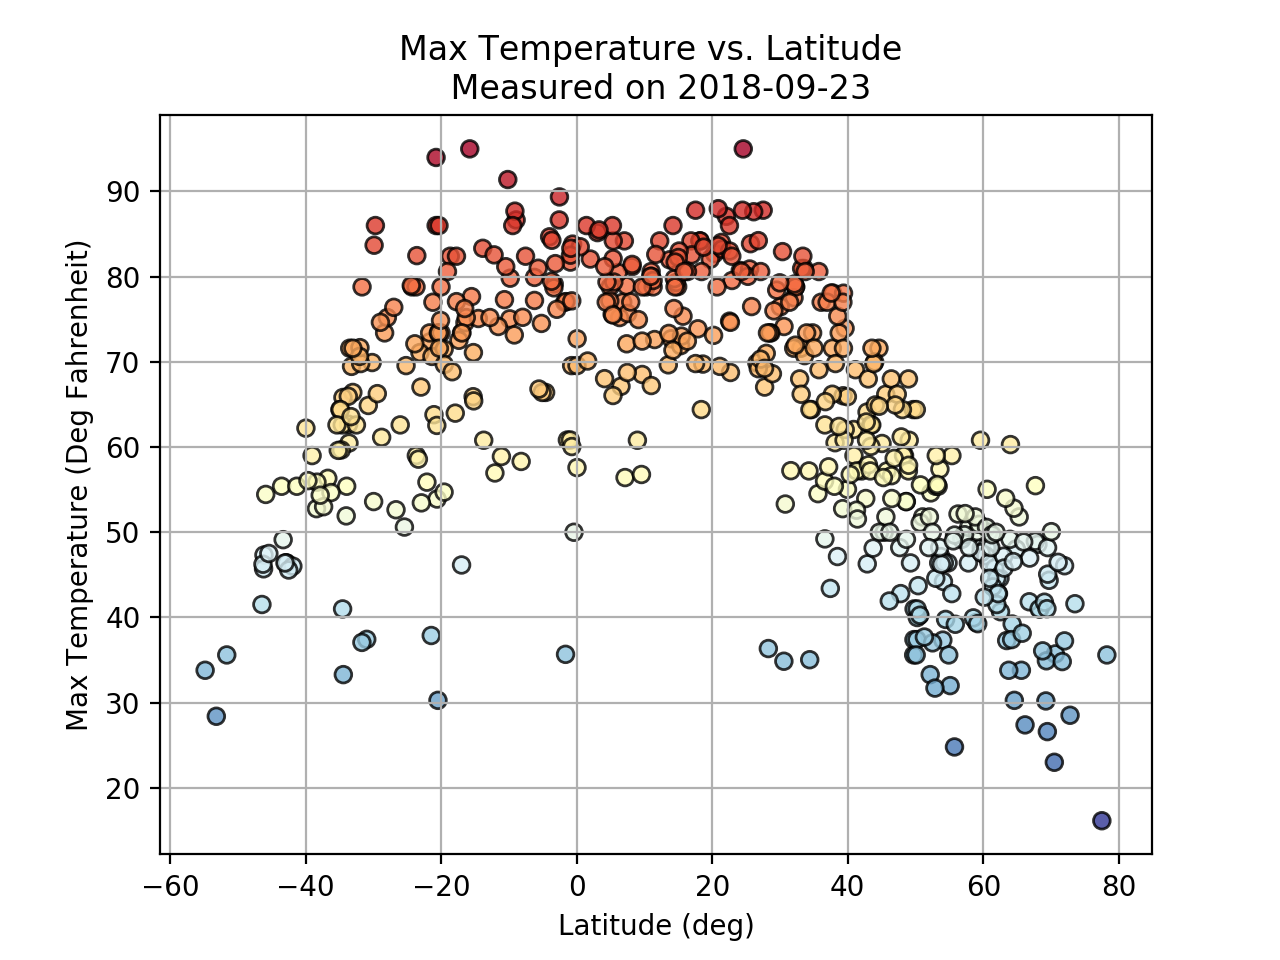

In [12]:
cm = plt.cm.get_cmap('RdYlBu_r')
color_range= weather_df['Max Temperature']
fig1, ax = plt.subplots()
temp_plot = ax.scatter(weather_df['Latitude'], weather_df['Max Temperature'], edgecolors='k', c=color_range, cmap=cm, alpha=0.8)

In [13]:
ax.grid()
plt.xlabel('Latitude (deg)')
plt.ylabel('Max Temperature (Deg Fahrenheit)')
plt.title(f'Max Temperature vs. Latitude \n Measured on {date}')

Text(0.5, 1.0, 'Max Temperature vs. Latitude \n Measured on 2018-09-23')

In [14]:
plt.savefig('Images/Temp_vs_lat.png')
plt.close(fig1)

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


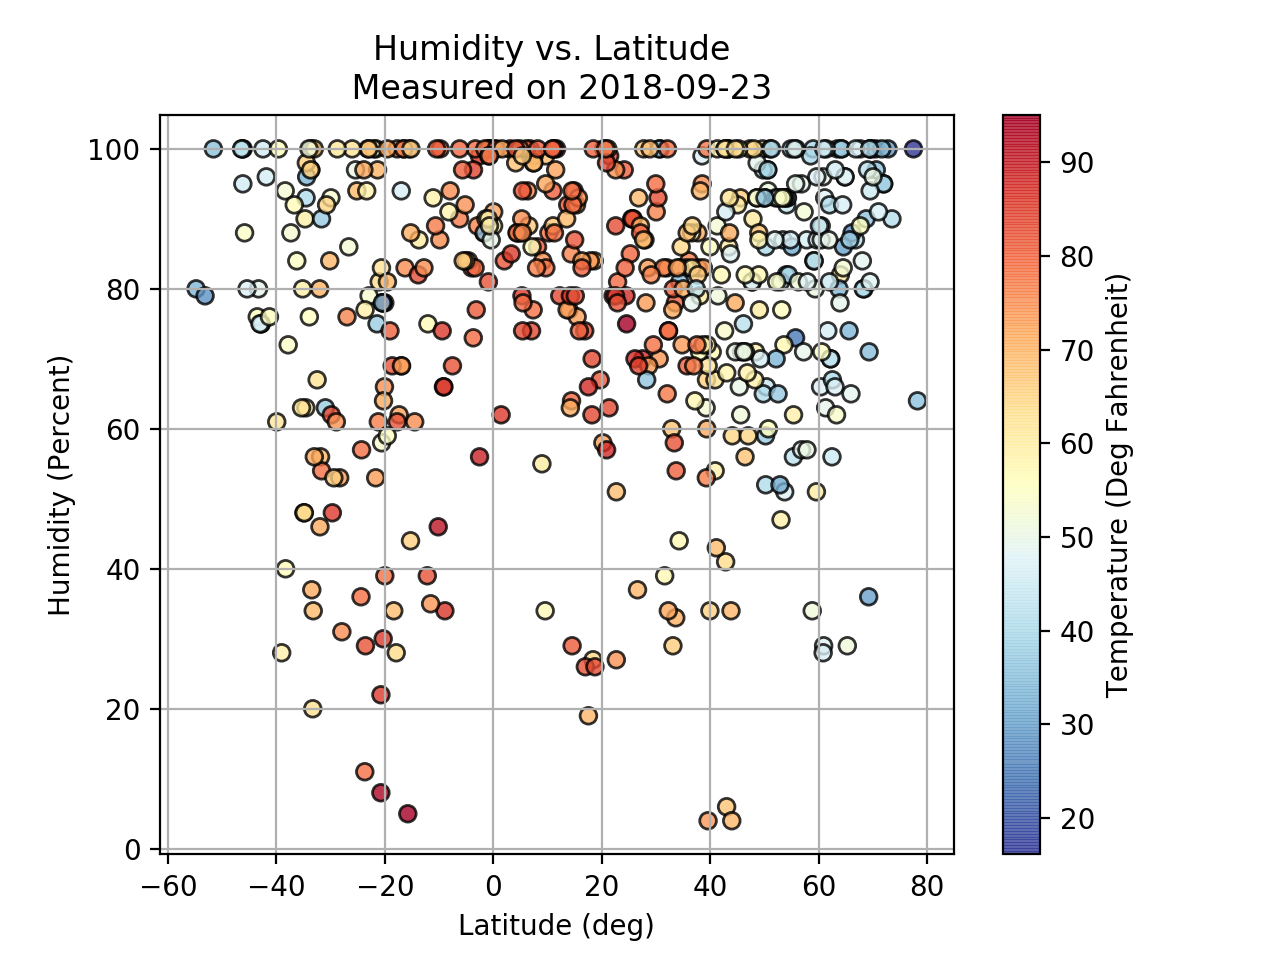

In [15]:
cm = plt.cm.get_cmap('RdYlBu_r')
color_range= weather_df['Max Temperature']
fig2, ax = plt.subplots()
humidity_plot = ax.scatter(weather_df['Latitude'], weather_df['Humidity'], c=color_range, cmap=cm, edgecolors='k', alpha=0.8)

In [16]:
ax.grid(True)
cb=plt.colorbar(humidity_plot)
cb.set_label('Temperature (Deg Fahrenheit)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (Percent)')
plt.title(f'Humidity vs. Latitude \n Measured on {date}')

Text(0.5, 1.0, 'Humidity vs. Latitude \n Measured on 2018-09-23')

In [17]:
plt.savefig('Images/Humidity_vs_lat.png')
plt.close(fig2)

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


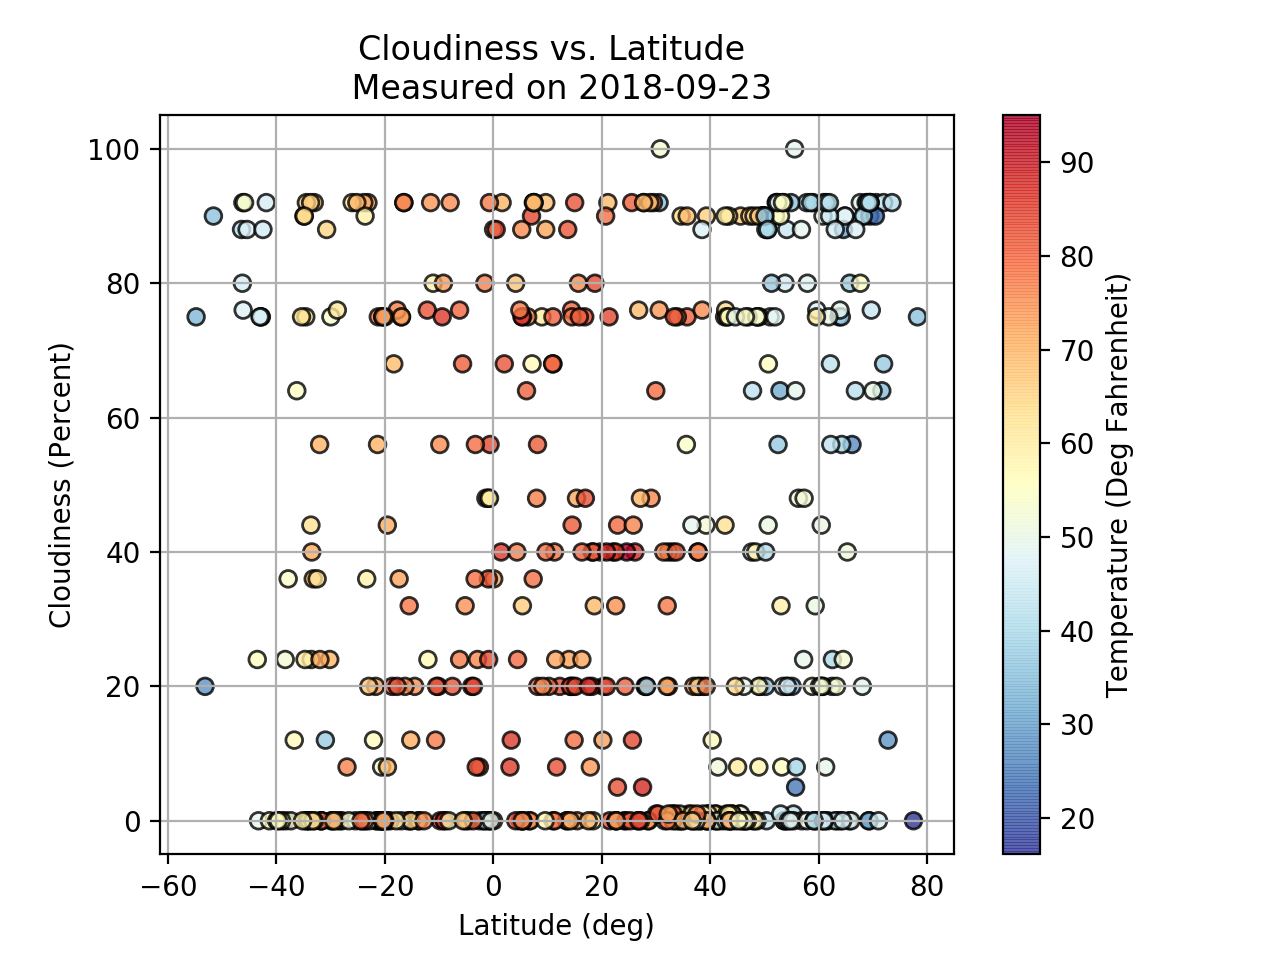

In [18]:
cm = plt.cm.get_cmap('RdYlBu_r')
color_range=  weather_df['Max Temperature']
fig3, ax = plt.subplots()
cloudiness_plot = ax.scatter(weather_df['Latitude'], weather_df['Cloudiness'], c=color_range, cmap=cm, edgecolors='k', alpha=0.8)

In [19]:
ax.grid()
cb=plt.colorbar(cloudiness_plot)
cb.set_label('Temperature (Deg Fahrenheit)')
plt.xlabel('Latitude (deg)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (Percent)')
plt.title(f'Cloudiness vs. Latitude \n Measured on {date}')

Text(0.5, 1.0, 'Cloudiness vs. Latitude \n Measured on 2018-09-23')

In [20]:
plt.savefig('Images/Cloudiness_vs_lat.png')
plt.close(fig3)

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


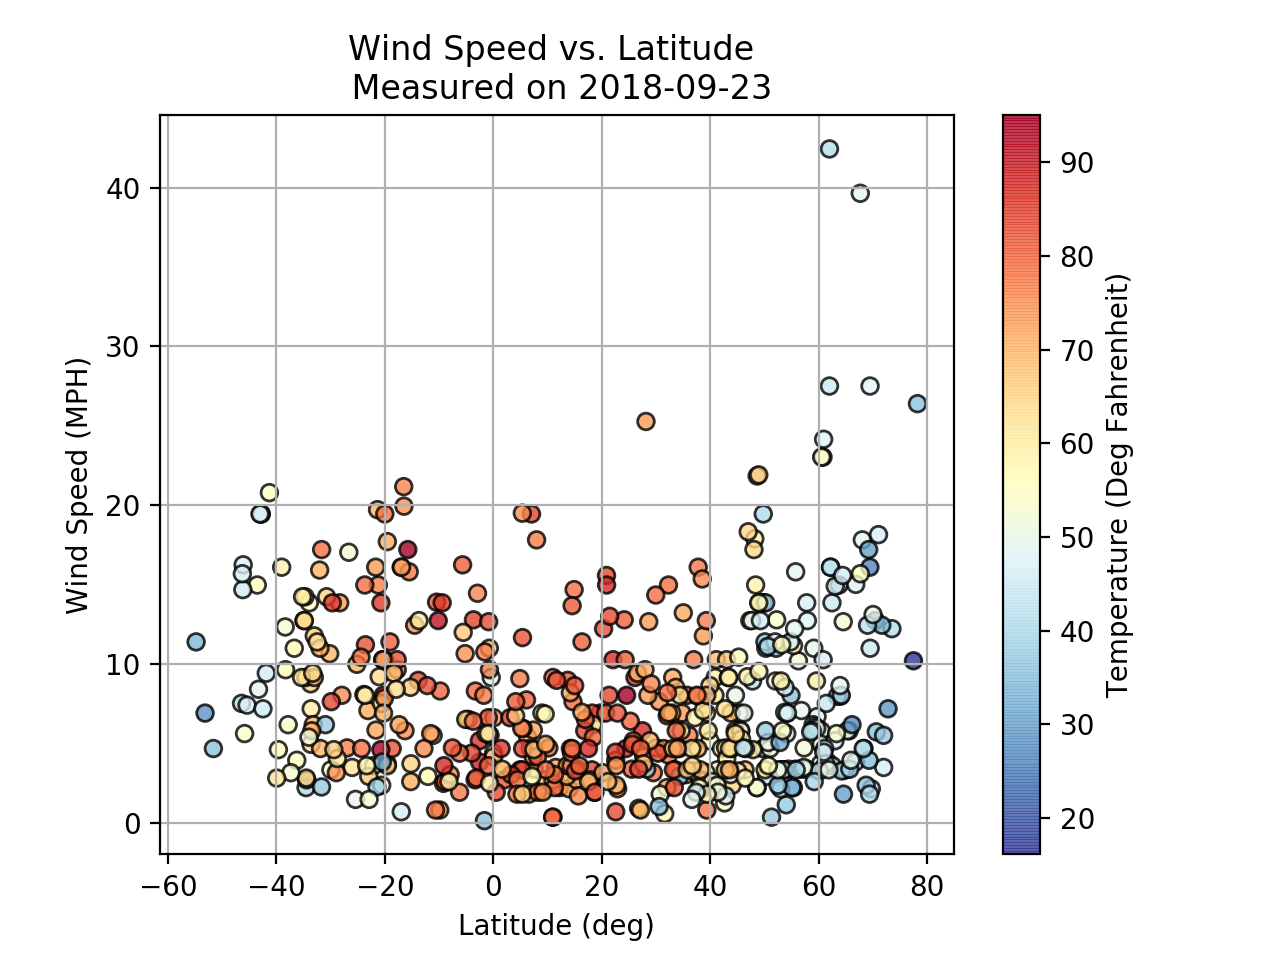

In [21]:
cm = plt.cm.get_cmap('RdYlBu_r')
color_range= weather_df['Max Temperature']
fig4, ax = plt.subplots()
wind_plot = ax.scatter(weather_df['Latitude'], weather_df['Wind Speed'], c=color_range, cmap=cm, edgecolors='k', alpha=0.8)

In [22]:
ax.grid()
cb=plt.colorbar(wind_plot)
cb.set_label('Temperature (Deg Fahrenheit)')
plt.xlabel('Latitude (deg)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (MPH)')
plt.title(f'Wind Speed vs. Latitude \n Measured on {date}')

Text(0.5, 1.0, 'Wind Speed vs. Latitude \n Measured on 2018-09-23')

In [23]:
plt.savefig('Images/Wind_speed_vs_lat.png')
plt.close(fig4)